# Linear Regression

In this tutorial we will implement a linear regression model. We will also implement a function that splits the available data into a training and a testting part.

## Problem Setting

We will use the Boston Housing Dataset. This dataset contains information collected by the U.S Census Service concerning housing in the city of Boston in the state of Massachusetts in 1978. Our goal is to predict the median value of the houses in a particular town in the city of Boston given its attributes. Check the file ’housing.names’ for more information on the attributes.

In [2]:
import urllib
import pandas as pd
import numpy as np
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

from sklearn.datasets import load_boston
boston=load_boston()
urllib.request.urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names", "housing.names")
df=pd.DataFrame(boston.data)
df.columns=['crime_rate','res_land_zoned','industry','charles_river','nox','avg_num_rooms','prop_bf_1940','dst_emply_center','rd_highway_idx','tax_rate','stdnt_tchr_ratio','prop_blacks','low_status_pct']
X=boston.data
y=boston.target


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df.head(10)

,crime_rate,res_land_zoned,industry,charles_river,nox,avg_num_rooms,prop_bf_1940,dst_emply_center,rd_highway_idx,tax_rate,stdnt_tchr_ratio,prop_blacks,low_status_pct
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


### Exercise 1

Write the *split_train_test(X,y,split,seed)*, given an instance matrix $X \in \mathbb{R}^{N \times D}$, labels $y \in Y^N$, a split ratio in $[0, 1]$ and a random seed $\in \mathbb{Z}$. Split the dataset in $(split×100)\%$ of the instances for training our model and the rest for testing, i.e. 

$$ \left|X_{\text{train}}\right| = \lceil \text{split} \cdot N \rceil, \qquad |X_{\text{train}}| + |X_{\text{test}}| = N. $$
Make sure you use the given random number generator seed so we all get the same results. The function is supposed to return:

- X_train, y_train: the training instances and labels;
- X_test, y_test: the test instances and labels,

in the same order as was mentioned.

Hint: It may be helpful to use shuffling functionality (e.g. np.random.shuffle).

In [53]:
def split_train_test(X,y,split,seed):
    full_data = np.c_[X,y]
    np.random.seed(seed)
    np.random.shuffle(full_data)
    data_length = full_data.shape[0]
    split = int(split * data_length)
    train = full_data[0:split,:]
    test = full_data[split:data_length,:]
    return train[:,0:13], train[:,-1], test[:,0:13], test[:,-1]

### Exercise 2

Write the function *train_linear_reg(X_train,y_train,lmbd)*.
Implement the ridge regression model (slide 24). The function should output the learned weight vector $\theta \in \mathbb{R}^D$ or $\mathbb{R}^{D+1}$ (depending on whether you are adding *bias*).

In [54]:
def train_linear_reg(X, y, lmbd):
    w = np.dot(X.T, X) + lmbd * np.identity(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(w), X.T), y)
    return theta

### Exercise 3

Write the function *predict(X,theta)* which predicts housing values vector pred for a dataset X and a previously trained parameter vector $\theta$.

In [60]:
def predict(X, theta):
    return np.dot(X,theta)

### Exercise 4

Write the function *mean_abs_loss(y_true,y_pred)* which computes the mean of the absolute differences between our prediction vector $y\_pred$ and the real housing values $y\_true$.

In [95]:
def mean_abs_loss(y_true,y_pred):
    return np.mean(np.absolute(y_pred-y_true))

def abs_loss(y_true,y_pred):
    return np.absolute(y_pred-y_true)

### Exercise 5

Evaluate your solutions by running the following code. 

Moreover, answer the following questions: What is the most important feature in your model? Are there features that are not so important? What happens if you remove them? Are there outliers with a high absolute loss?

In [102]:
seed = 3
lmbd=1
split=0.7
X_train,y_train,X_test,y_test=split_train_test(X,y,split,seed)
theta=train_linear_reg(X_train,y_train,lmbd)
y_pred=predict(X_test,theta)
mae=mean_abs_loss(y_test,y_pred)
print('The mean absolute loss is {loss:0.3f}'.format(loss=mae*1000))
print(theta)

The mean absolute loss is 3411.967
[ 0.03271394  0.04117476  0.01857174  2.53392195 -2.40429151  5.99002799
 -0.01650838 -1.02765155  0.13521254 -0.01162989 -0.3907285   0.01808462
 -0.44342447]


# Are there outliers with a high absolute loss?
Yes, as the plot shows there are some heavy outliers with a loss > 15

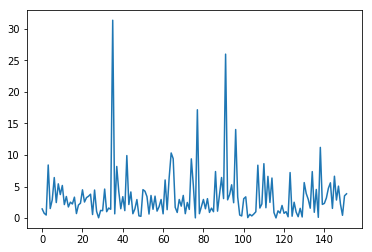

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
abs = abs_loss(y_test,y_pred)
plt.plot(abs)

# What is the most important feature in your model?
Judging from the high F value for the "% of lower class population" this feature is the most important one.
NB this approach might be a bit naive, but its late.

In [101]:
sk.feature_selection.f_regression(X, y, center=True)


(array([ 88.15124178,  75.2576423 , 153.95488314,  15.97151242,
        112.59148028, 471.84673988,  83.47745922,  33.57957033,
         85.91427767, 141.76135658, 175.10554288,  63.05422911,
        601.61787111]),
 array([2.08355011e-19, 5.71358415e-17, 4.90025998e-31, 7.39062317e-05,
        7.06504159e-24, 2.48722887e-74, 1.56998221e-18, 1.20661173e-08,
        5.46593257e-19, 5.63773363e-29, 1.60950948e-34, 1.31811273e-14,
        5.08110339e-88]))

# Are there features that are not so important? What happens if you remove them?
Yes, there are features wich are not so important (lets just say the ones with a rather low F value). If we remove them, not much should happen to our prediction (they are not strongly correlated to the output after all).

In [92]:
import sklearn.linear_model as skl
import sklearn as sk
from sklearn.metrics import mean_absolute_error
clf = skl.Ridge(alpha=1.0, solver='cholesky')
clf.fit(X_train, y_train) 
pred_test = clf.predict(X_test)
mean_absolute_error(y_test, pred_test)*1000
# roughly the same so i guess it works

3425.371865996063